In [198]:
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [19]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('contrib_data_true.csv',header=0)
ees=pd.read_csv('company_ees.csv',header=0)
%matplotlib inline
sns.set_style('darkgrid')

In [12]:
cbase=pd.merge(df, ees, left_on='cId', right_on='id', how='inner')[['id','loc','active_regular_employees','ee_contribution_type', 'ee_contribution','dep_contribution_type', 'dep_contribution']]

In [14]:
cbase=cbase[(cbase['active_regular_employees'] >= 1) & (cbase['active_regular_employees'] <= 10)]

# EE Percentage Distribution - Medical

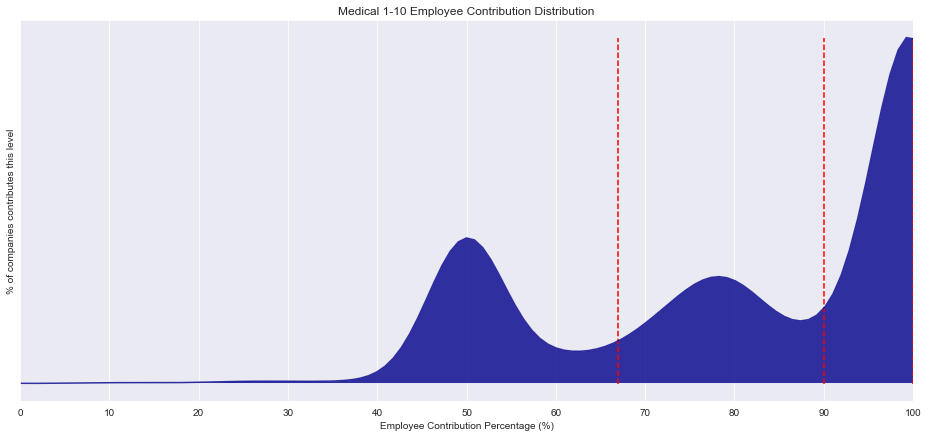

In [190]:
# medical percentage distribution - ee
m_pct_dist=cbase.loc[(cbase['ee_contribution_type']=='Percentage') & (cbase['loc']=='medical'),['id','ee_contribution']]
m_pct_dist['pct_1']=np.floor(m_pct_dist['ee_contribution']/10)*10
m_pct_dist['pct_2']=np.floor(m_pct_dist['ee_contribution']%10)
m_pct_dist['pct_2']=np.floor(m_pct_dist['pct_2']/5)*5
m_pct_dist['pct']=m_pct_dist['pct_1']+m_pct_dist['pct_2']
m_pct_dist=m_pct_dist[['id','ee_contribution']].drop_duplicates()
# pct_dist=m_pct_dist.groupby('pct',as_index=False)['id'].count()
# pct_dist['share']=pct_dist['id']/sum(pct_dist['id'])
# pct_dist['cumulative_share']=pct_dist.sort_values(by='pct')['share'].cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(16, 7))


p=sns.kdeplot(m_pct_dist['ee_contribution'], color='darkblue',alpha=0.8, ax=ax,shade=True)
p.set(xlim=(0, 100))
ymax=np.max(p.get_lines()[0].get_data()[1])
ax.vlines(np.percentile(m_pct_dist['ee_contribution'],[25,50,75]),0,ymax,color='red',linestyle='--')

ax.set_xlabel('Employee Contribution Percentage (%)')
ax.set_ylabel('% of companies contributes this level')
ax.set_title('Medical 1-10 Employee Contribution Distribution')
ax.set_xticks(np.arange(0,101,10))
ax.set_yticks([])
ax.get_legend().remove()




# fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(14, 14))

# sns.barplot(data=pct_dist, x='pct',y='share',color='darkblue',alpha=0.8,ax=ax[0])
# ax[0].set_xlabel('employee contribution percentage (%)')
# ax[0].set_ylabel('% of companies contributes this level')
# ax[0].set_title('Medical 1-10 Employee Contribution Distribution')
# vals = ax[0].get_yticks()
# ax[0].set_yticklabels(['{:,.2%}'.format(x) for x in vals])

# sns.kdeplot(m_pct_dist['pct'], color='darkblue',alpha=0.8, ax=ax[0],shade=True).set(xlim=(0, 110))
# ax[0].vlines(np.percentile(m_pct_dist['pct'],[25,50,75]),0,0.04,color='red',linestyle='--')

# ax[0].set_xlabel('Employee Contribution Percentage (%)')
# ax[0].set_ylabel('% of companies contributes this level')
# ax[0].set_title('Medical 1-10 Employee Contribution Distribution')
# ax[0].set_xticks(np.arange(0,110,10))
# ax[0].get_legend().remove()

# vals = ax[0].get_yticks()
# ax[0].set_yticklabels(['{:,.2%}'.format(x) for x in vals])

# sns.barplot(data=pct_dist, x='pct',y='cumulative_share',color='darkblue',alpha=0.8,ax=ax[1])
# ax[1].set_xlabel('employee contribution percentage (%)')
# ax[1].set_ylabel('% of companies contributes this level')
# ax[1].set_title('Medical 1-10 Employee Contribution Cumulative Distribution')
# vals = ax[1].get_yticks()
# ax[1].set_yticklabels(['{:,.2%}'.format(x) for x in vals])


# fig, ax = plt.subplots(figsize=(8, 4))
# ax.hist(m_pct_dist['ee_contribution'], 19, density=True,cumulative=True, label='Empirical')
# ax.set_xticks(np.arange(0,100,10))

# EE Percentage Distribution - Dental

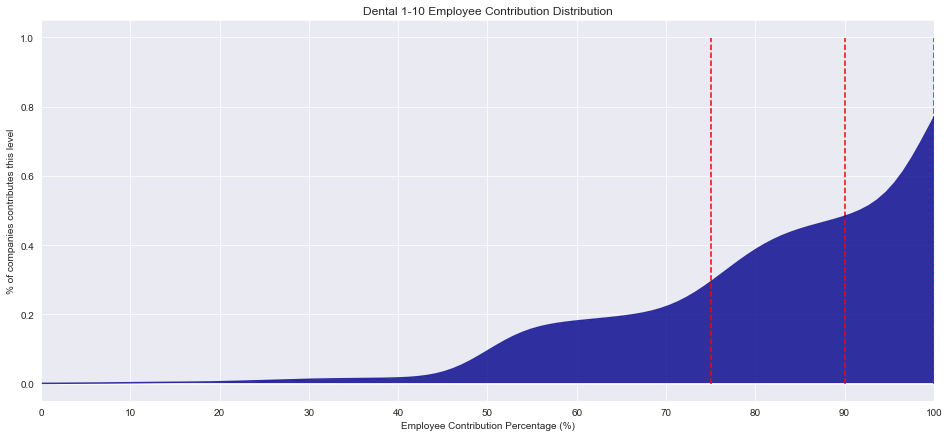

In [194]:
# medical percentage distribution - ee
d_pct_dist=cbase.loc[(cbase['ee_contribution_type']=='Percentage') & (cbase['loc']=='dental'),['id','ee_contribution']]
d_pct_dist['pct_1']=np.floor(d_pct_dist['ee_contribution']/10)*10
d_pct_dist['pct_2']=np.floor(d_pct_dist['ee_contribution']%10)
d_pct_dist['pct_2']=np.floor(d_pct_dist['pct_2']/5)*5
d_pct_dist['pct']=d_pct_dist['pct_1']+d_pct_dist['pct_2']
d_pct_dist=d_pct_dist[['id','ee_contribution']].drop_duplicates()
# pct_dist=m_pct_dist.groupby('pct',as_index=False)['id'].count()
# pct_dist['share']=pct_dist['id']/sum(pct_dist['id'])
# pct_dist['cumulative_share']=pct_dist.sort_values(by='pct')['share'].cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(16, 7))

p=sns.kdeplot(d_pct_dist['ee_contribution'], color='darkblue',alpha=0.8, ax=ax,shade=True, cumulative=True)
p.set(xlim=(0, 100))
ymax=np.max(p.get_lines()[0].get_data()[1])
ax.vlines(np.percentile(d_pct_dist['ee_contribution'],[25,50,75]),0,ymax,color='red',linestyle='--')

ax.set_xlabel('Employee Contribution Percentage (%)')
ax.set_ylabel('% of companies contributes this level')
ax.set_title('Dental 1-10 Employee Contribution Distribution')
ax.set_xticks(np.arange(0,101,10))
# ax.set_yticks([])
ax.get_legend().remove()


# EE Percentage Distribution - Vision

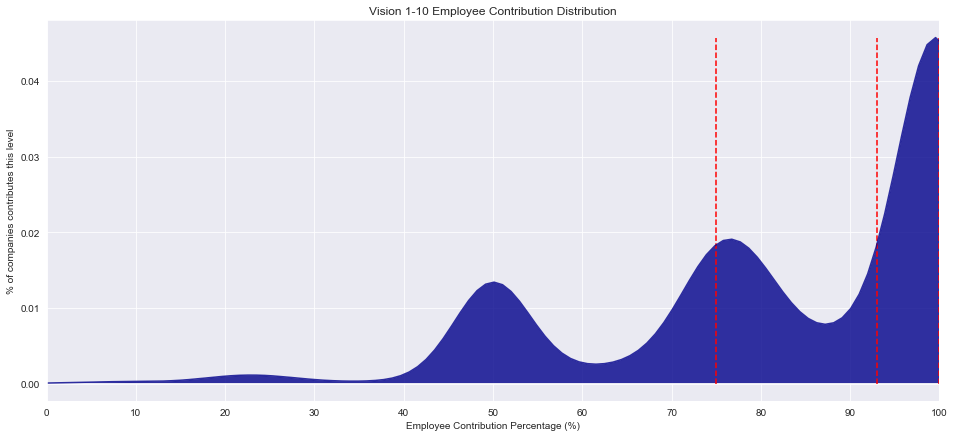

In [189]:
# medical percentage distribution - ee
v_pct_dist=cbase.loc[(cbase['ee_contribution_type']=='Percentage') & (cbase['loc']=='vision'),['id','ee_contribution']]
v_pct_dist['pct_1']=np.floor(v_pct_dist['ee_contribution']/10)*10
v_pct_dist['pct_2']=np.floor(v_pct_dist['ee_contribution']%10)
v_pct_dist['pct_2']=np.floor(v_pct_dist['pct_2']/5)*5
v_pct_dist['pct']=v_pct_dist['pct_1']+v_pct_dist['pct_2']
v_pct_dist=v_pct_dist[['id','ee_contribution']].drop_duplicates()
# pct_dist=m_pct_dist.groupby('pct',as_index=False)['id'].count()
# pct_dist['share']=pct_dist['id']/sum(pct_dist['id'])
# pct_dist['cumulative_share']=pct_dist.sort_values(by='pct')['share'].cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(16, 7))

p=sns.kdeplot(v_pct_dist['ee_contribution'], color='darkblue',alpha=0.8, ax=ax,shade=True)
p.set(xlim=(0, 100))
ymax=np.max(p.get_lines()[0].get_data()[1])
ax.vlines(np.percentile(v_pct_dist['ee_contribution'],[25,50,75]),0,ymax,color='red',linestyle='--')

ax.set_xlabel('Employee Contribution Percentage (%)')
ax.set_ylabel('% of companies contributes this level')
ax.set_title('Vision 1-10 Employee Contribution Distribution')
ax.set_xticks(np.arange(0,101,10))
ax.get_legend().remove()

# EE Fixed Distribution - Medical

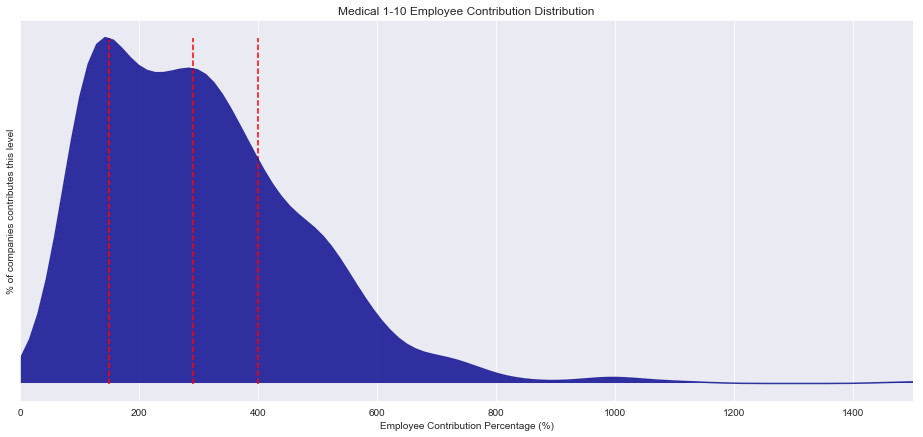

In [196]:
# medical percentage distribution - ee
m_pct_dist=cbase.loc[(cbase['ee_contribution_type']=='Fixed') & (cbase['loc']=='medical'),['id','ee_contribution']]
# m_pct_dist['pct_1']=np.floor(m_pct_dist['ee_contribution']/10)*10
# m_pct_dist['pct_2']=np.floor(m_pct_dist['ee_contribution']%10)
# m_pct_dist['pct_2']=np.floor(m_pct_dist['pct_2']/5)*5
# m_pct_dist['pct']=m_pct_dist['pct_1']+m_pct_dist['pct_2']
m_pct_dist=m_pct_dist[['id','ee_contribution']].drop_duplicates()
# pct_dist=m_pct_dist.groupby('pct',as_index=False)['id'].count()
# pct_dist['share']=pct_dist['id']/sum(pct_dist['id'])
# pct_dist['cumulative_share']=pct_dist.sort_values(by='pct')['share'].cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(16, 7))


p=sns.kdeplot(m_pct_dist['ee_contribution'], color='darkblue',alpha=0.8, ax=ax,shade=True)
p.set(xlim=(0, max(m_pct_dist['ee_contribution'])))
ymax=np.max(p.get_lines()[0].get_data()[1])
ax.vlines(np.percentile(m_pct_dist['ee_contribution'],[25,50,75]),0,ymax,color='red',linestyle='--')

ax.set_xlabel('Employee Contribution Percentage (%)')
ax.set_ylabel('% of companies contributes this level')
ax.set_title('Medical 1-10 Employee Contribution Distribution')
# ax.set_xticks(np.arange(0,101,10))
ax.set_yticks([])
ax.get_legend().remove()

[Text(0, 0, '0.00%'),
 Text(0, 0, '20.00%'),
 Text(0, 0, '40.00%'),
 Text(0, 0, '60.00%'),
 Text(0, 0, '80.00%'),
 Text(0, 0, '100.00%'),
 Text(0, 0, '120.00%')]

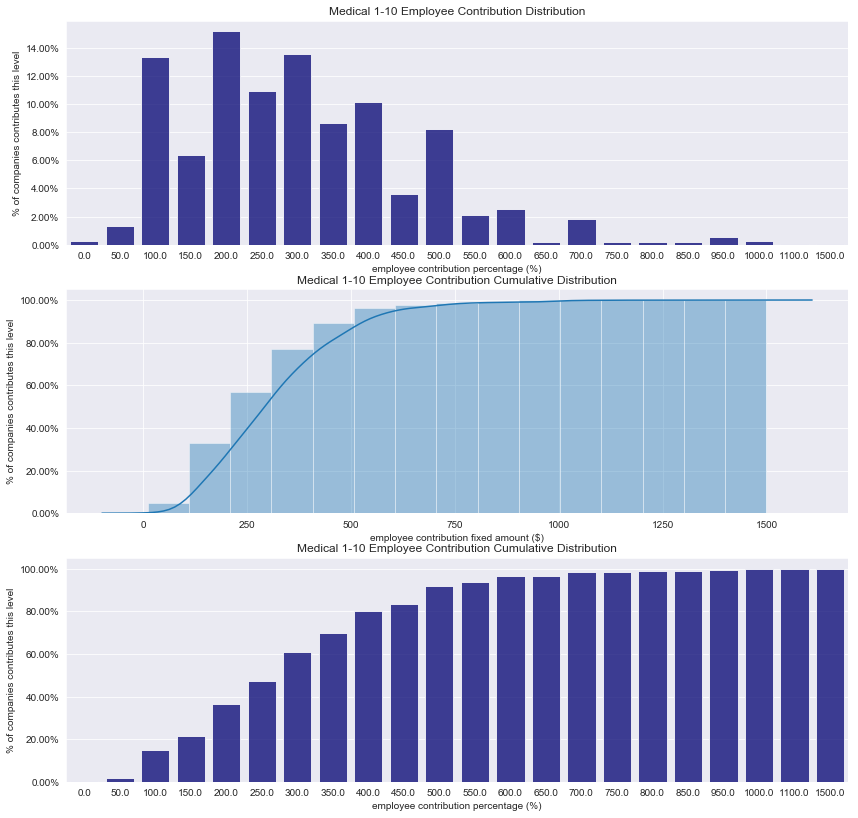

In [135]:
m_fix_dist=cbase.loc[(cbase['ee_contribution_type']=='Fixed') & (cbase['loc']=='medical'),['id','ee_contribution']]
# the_upper=np.percentile(m_fix_dist['ee_contribution'],99)
# m_fix_dist['ee_contribution']=np.where(m_fix_dist['ee_contribution']>the_upper,the_upper,m_fix_dist['ee_contribution'])
m_fix_dist['ee_contribution_1']=np.floor(m_fix_dist['ee_contribution']/100)*100
m_fix_dist['ee_contribution_2']=np.floor(m_fix_dist['ee_contribution']%100/50)*50
m_fix_dist['ee_contribution_new']=m_fix_dist['ee_contribution_1'] + m_fix_dist['ee_contribution_2']

fix_dist = m_fix_dist.groupby('ee_contribution_new', as_index=False)['id'].count()
fix_dist['share']=fix_dist['id']/sum(fix_dist['id'])
fix_dist['cumulative_share']=fix_dist.sort_values(by='ee_contribution_new')['share'].cumsum()



fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(14, 14))

sns.barplot(data=fix_dist, x='ee_contribution_new',y='share',color='darkblue',alpha=0.8,ax=ax[0])
# sns.kdeplot(data=fix_dist['ee_contribution_new'], ax=ax[0])
ax[0].set_xlabel('employee contribution percentage ($)')
ax[0].set_ylabel('% of companies contributes this level')
ax[0].set_title('Medical 1-10 Employee Contribution Distribution')
vals = ax[0].get_yticks()
ax[0].set_yticklabels(['{:,.2%}'.format(x) for x in vals])


# sns.distplot(m_fix_dist['ee_contribution'],bins=15,ax=ax[0])
# the_ratio=1/sum(ax[0].get_yticks())
# ax[0].set_xlabel('employee contribution fixed amount ($)')
# ax[0].set_ylabel('% of companies contributes this level')
# ax[0].set_title('Medical 1-10 Employee Contribution Distribution')
# ax[0].set_yticklabels(['{:,.2%}'.format(x) for x in ax[0].get_yticks()*the_ratio])
sns.barplot(data=fix_dist, x='ee_contribution_new',y='cumulative_share',color='darkblue',alpha=0.8,ax=ax[2])
ax[2].set_xlabel('employee contribution percentage ($)')
ax[2].set_ylabel('% of companies contributes this level')
ax[2].set_title('Medical 1-10 Employee Contribution Cumulative Distribution')
vals = ax[2].get_yticks()
ax[2].set_yticklabels(['{:,.2%}'.format(x) for x in vals])





sns.distplot(m_fix_dist['ee_contribution'],bins=15,ax=ax[1],hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
# the_ratio=1/sum(ax[1].get_yticks())
ax[1].set_xlabel('employee contribution fixed amount ($)')
ax[1].set_ylabel('% of companies contributes this level')
ax[1].set_title('Medical 1-10 Employee Contribution Cumulative Distribution')
ax[1].set_yticklabels(['{:,.2%}'.format(x) for x in ax[1].get_yticks()])

# print(ax[0].get_yticks())
# print(1/sum(ax[0].get_yticks()))

# EE Fixed Distribution - Dental

[Text(0, 0, '0.00%'),
 Text(0, 0, '20.00%'),
 Text(0, 0, '40.00%'),
 Text(0, 0, '60.00%'),
 Text(0, 0, '80.00%'),
 Text(0, 0, '100.00%'),
 Text(0, 0, '120.00%')]

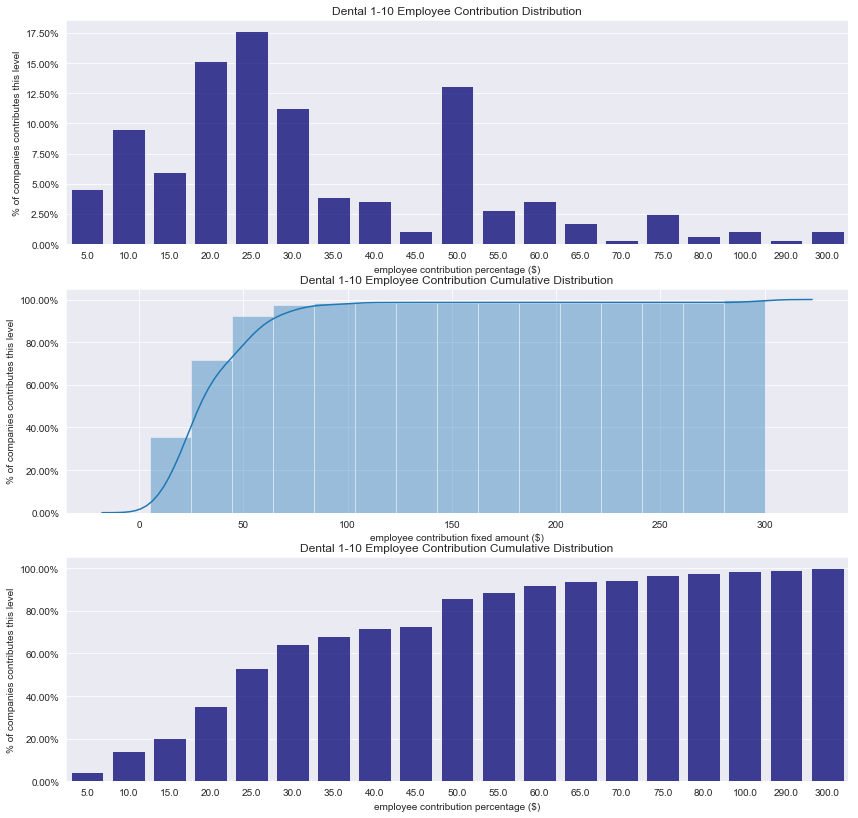

In [136]:
d_fix_dist=cbase.loc[(cbase['ee_contribution_type']=='Fixed') & (cbase['loc']=='dental'),['id','ee_contribution']]
# the_upper=np.percentile(m_fix_dist['ee_contribution'],99)
# m_fix_dist['ee_contribution']=np.where(m_fix_dist['ee_contribution']>the_upper,the_upper,m_fix_dist['ee_contribution'])
d_fix_dist['ee_contribution_1']=np.floor(d_fix_dist['ee_contribution']/10)*10
d_fix_dist['ee_contribution_2']=np.floor(d_fix_dist['ee_contribution']%10/5)*5
d_fix_dist['ee_contribution_new']=d_fix_dist['ee_contribution_1'] + d_fix_dist['ee_contribution_2']                  


fix_dist = d_fix_dist.groupby('ee_contribution_new', as_index=False)['id'].count()
fix_dist['share']=fix_dist['id']/sum(fix_dist['id'])
fix_dist['cumulative_share']=fix_dist.sort_values(by='ee_contribution_new')['share'].cumsum()



fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(14, 14))

sns.barplot(data=fix_dist, x='ee_contribution_new',y='share',color='darkblue',alpha=0.8,ax=ax[0])
# sns.kdeplot(data=fix_dist['ee_contribution_new'], ax=ax[0])
ax[0].set_xlabel('employee contribution percentage ($)')
ax[0].set_ylabel('% of companies contributes this level')
ax[0].set_title('Dental 1-10 Employee Contribution Distribution')
vals = ax[0].get_yticks()
ax[0].set_yticklabels(['{:,.2%}'.format(x) for x in vals])


# sns.distplot(m_fix_dist['ee_contribution'],bins=15,ax=ax[0])
# the_ratio=1/sum(ax[0].get_yticks())
# ax[0].set_xlabel('employee contribution fixed amount ($)')
# ax[0].set_ylabel('% of companies contributes this level')
# ax[0].set_title('Medical 1-10 Employee Contribution Distribution')
# ax[0].set_yticklabels(['{:,.2%}'.format(x) for x in ax[0].get_yticks()*the_ratio])
sns.barplot(data=fix_dist, x='ee_contribution_new',y='cumulative_share',color='darkblue',alpha=0.8,ax=ax[2])
ax[2].set_xlabel('employee contribution percentage ($)')
ax[2].set_ylabel('% of companies contributes this level')
ax[2].set_title('Dental 1-10 Employee Contribution Cumulative Distribution')
vals = ax[2].get_yticks()
ax[2].set_yticklabels(['{:,.2%}'.format(x) for x in vals])





sns.distplot(d_fix_dist['ee_contribution'],bins=15,ax=ax[1],hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
# the_ratio=1/sum(ax[1].get_yticks())
ax[1].set_xlabel('employee contribution fixed amount ($)')
ax[1].set_ylabel('% of companies contributes this level')
ax[1].set_title('Dental 1-10 Employee Contribution Cumulative Distribution')
ax[1].set_yticklabels(['{:,.2%}'.format(x) for x in ax[1].get_yticks()])

[Text(0, 0, '0.00%'),
 Text(0, 0, '20.00%'),
 Text(0, 0, '40.00%'),
 Text(0, 0, '60.00%'),
 Text(0, 0, '80.00%'),
 Text(0, 0, '100.00%'),
 Text(0, 0, '120.00%')]

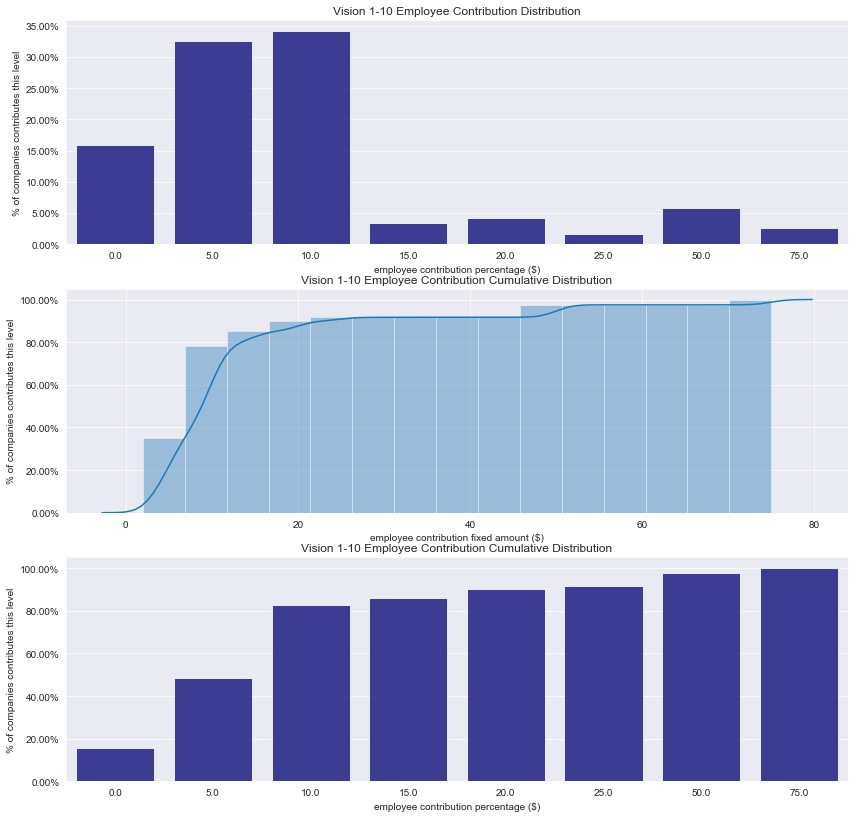

In [137]:
v_fix_dist=cbase.loc[(cbase['ee_contribution_type']=='Fixed') & (cbase['loc']=='vision'),['id','ee_contribution']]
# the_upper=np.percentile(m_fix_dist['ee_contribution'],99)
# m_fix_dist['ee_contribution']=np.where(m_fix_dist['ee_contribution']>the_upper,the_upper,m_fix_dist['ee_contribution'])
v_fix_dist['ee_contribution_1']=np.floor(v_fix_dist['ee_contribution']/10)*10
v_fix_dist['ee_contribution_2']=np.floor(v_fix_dist['ee_contribution']%10/5)*5
v_fix_dist['ee_contribution_new']=v_fix_dist['ee_contribution_1'] + v_fix_dist['ee_contribution_2']                  


fix_dist = v_fix_dist.groupby('ee_contribution_new', as_index=False)['id'].count()
fix_dist['share']=fix_dist['id']/sum(fix_dist['id'])
fix_dist['cumulative_share']=fix_dist.sort_values(by='ee_contribution_new')['share'].cumsum()



fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(14, 14))

sns.barplot(data=fix_dist, x='ee_contribution_new',y='share',color='darkblue',alpha=0.8,ax=ax[0])
# sns.kdeplot(data=fix_dist['ee_contribution_new'], ax=ax[0])
ax[0].set_xlabel('employee contribution percentage ($)')
ax[0].set_ylabel('% of companies contributes this level')
ax[0].set_title('Vision 1-10 Employee Contribution Distribution')
vals = ax[0].get_yticks()
ax[0].set_yticklabels(['{:,.2%}'.format(x) for x in vals])


# sns.distplot(m_fix_dist['ee_contribution'],bins=15,ax=ax[0])
# the_ratio=1/sum(ax[0].get_yticks())
# ax[0].set_xlabel('employee contribution fixed amount ($)')
# ax[0].set_ylabel('% of companies contributes this level')
# ax[0].set_title('Medical 1-10 Employee Contribution Distribution')
# ax[0].set_yticklabels(['{:,.2%}'.format(x) for x in ax[0].get_yticks()*the_ratio])
sns.barplot(data=fix_dist, x='ee_contribution_new',y='cumulative_share',color='darkblue',alpha=0.8,ax=ax[2])
ax[2].set_xlabel('employee contribution percentage ($)')
ax[2].set_ylabel('% of companies contributes this level')
ax[2].set_title('Vision 1-10 Employee Contribution Cumulative Distribution')
vals = ax[2].get_yticks()
ax[2].set_yticklabels(['{:,.2%}'.format(x) for x in vals])





sns.distplot(v_fix_dist['ee_contribution'],bins=15,ax=ax[1],hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
# the_ratio=1/sum(ax[1].get_yticks())
ax[1].set_xlabel('employee contribution fixed amount ($)')
ax[1].set_ylabel('% of companies contributes this level')
ax[1].set_title('Vision 1-10 Employee Contribution Cumulative Distribution')
ax[1].set_yticklabels(['{:,.2%}'.format(x) for x in ax[1].get_yticks()])